In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('movies.csv')

In [9]:
data.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [11]:
data= data[['id', 'title',  'overview', 'genres', 'keywords','vote_average','popularity']]

In [12]:
data.isnull().sum()

id              0
title           0
overview        3
genres          0
keywords        0
vote_average    0
popularity      0
dtype: int64

In [13]:
data.dropna(inplace=True)
data.iloc[2].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]'

In [14]:
import ast

In [15]:
#convert the above data into [action, adventure, fantasy, scify]
# for this we going to write a funtion orignal_format()

def fetch_name(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name']);
    return L

In [16]:
data['genres']=data['genres'].apply(fetch_name)

In [17]:
data['keywords']= data['keywords'].apply(fetch_name)

In [18]:
# make string into lists
data['overview'] = data['overview'].apply(lambda x: x.split())

In [19]:
data.head()

,id,title,overview,genres,keywords,vote_average,popularity
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",7.2,150.437577
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",6.9,139.082615
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",6.3,107.376788
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",7.6,112.312950
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",6.1,43.926995


In [20]:
# to remove space between two words
data['genres'] = data['genres'].apply(lambda x:[i.replace(" ", "")for i in x])
data['keywords'] = data['keywords'].apply(lambda x:[i.replace(" ", "")for i in x])

In [21]:
data['tags'] = data['overview'] + data['genres']+data['keywords']

In [22]:
# kam wala data separate kr liya
new_data = data[['id', 'title', 'tags','vote_average','popularity']]

In [23]:
new_data['tags'] = new_data['tags'].apply(lambda x: " ".join(x))

C:\Users\Admin\AppData\Local\Temp\ipykernel_366452\1366722170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['tags'] = new_data['tags'].apply(lambda x: " ".join(x))


In [24]:
new_data.head()

,id,title,tags,vote_average,popularity
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",7.2,150.437577
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",6.9,139.082615
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,6.3,107.376788
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,7.6,112.312950
4,49529,John Carter,"John Carter is a war-weary, former military ca...",6.1,43.926995


In [25]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [26]:
def stem(text):
    ls = []
    for i in text.split():
        ls.append(ps.stem(i))
    return " ".join(ls)

In [27]:
new_data['tags']= new_data['tags'].apply(stem)

C:\Users\Admin\AppData\Local\Temp\ipykernel_366452\2137418083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['tags']= new_data['tags'].apply(stem)


In [28]:
new_data['tags'] = new_data['tags'].apply(lambda x:x.lower())

C:\Users\Admin\AppData\Local\Temp\ipykernel_366452\2492974546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['tags'] = new_data['tags'].apply(lambda x:x.lower())


In [29]:
new_data.head()

,id,title,tags,vote_average,popularity
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",7.2,150.437577
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c...",6.9,139.082615
2,206647,Spectre,a cryptic messag from bond’ past send him on a...,6.3,107.376788
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...,7.6,112.312950
4,49529,John Carter,"john carter is a war-weary, former militari ca...",6.1,43.926995


In [30]:
#for vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

In [31]:
vectors = cv.fit_transform(new_data['tags']).toarray()

In [32]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zombies', 'zone', 'zoo'], dtype=object)

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

In [35]:
similarity = cosine_similarity(vectors)

In [36]:
similarity[1]

array([0.09128709, 1.        , 0.06666667, ..., 0.02531848, 0.        ,
       0.02817181])

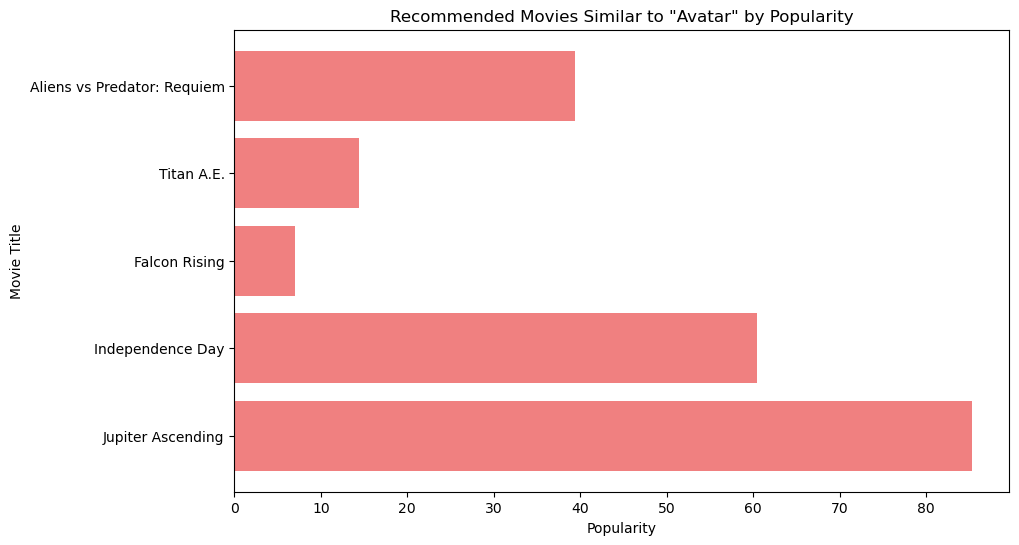

In [37]:
def recommend_and_plot_by_popularity(movie):
    # Find the index of the movie in the DataFrame
    movie_index = new_data[new_data['title'] == movie].index[0]
    distances = similarity[movie_index]
    
    # Get the top 5 most similar movies (excluding the selected one)
    movie_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]
    
    # Lists to store movie titles and their popularity scores
    titles = []
    popularity_scores = []
    
    for i in movie_list:
        title = new_data.iloc[i[0]]['title']
        popularity = new_data.iloc[i[0]]['popularity']
        
        titles.append(title)
        popularity_scores.append(popularity)
        
    # Plotting the popularity of the recommended movies
    plt.figure(figsize=(10, 6))
    plt.barh(titles, popularity_scores, color='lightcoral')
    plt.xlabel('Popularity')
    plt.ylabel('Movie Title')
    plt.title(f'Recommended Movies Similar to "{movie}" by Popularity')
    plt.gca().invert_yaxis()  # Highest popularity at the top
    plt.show()

# Example usage
recommend_and_plot_by_popularity("Avatar")

Aliens vs Predator: Requiem
Titan A.E.
Falcon Rising
Independence Day
Jupiter Ascending


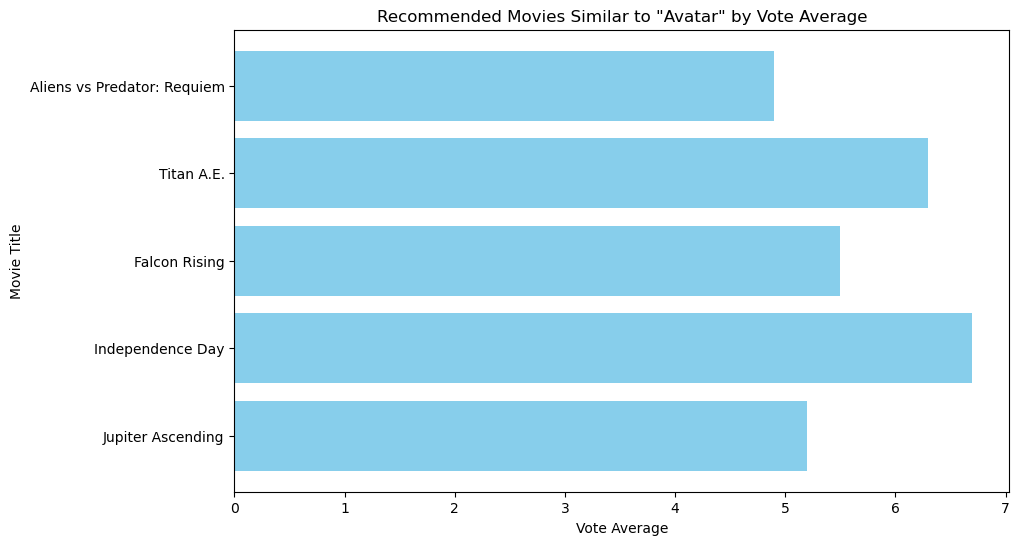

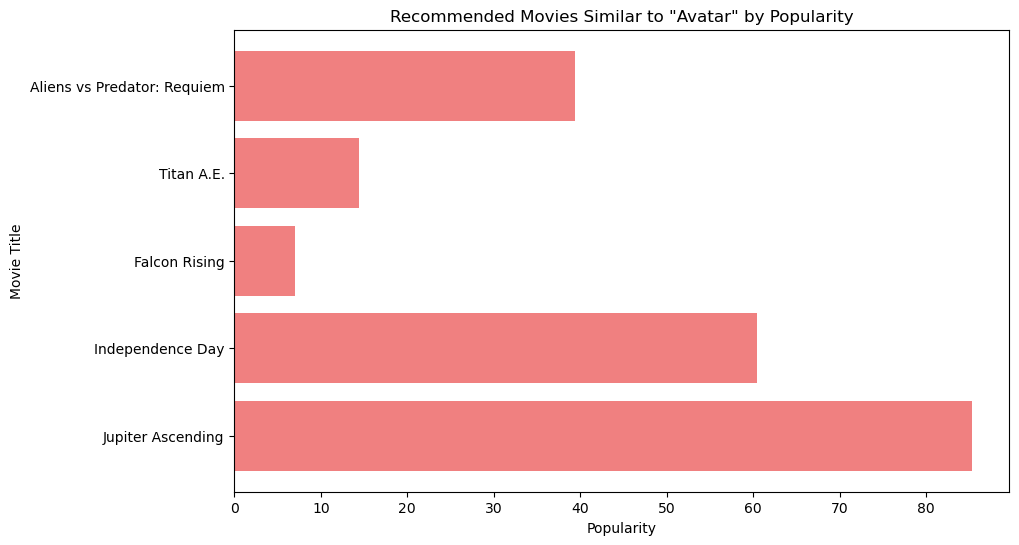

In [38]:
def recommend(movie):
    movie_index = new_data[new_data['title'] == movie].index[0]
    distances = similarity[movie_index]
    
    movie_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]
    
    # Lists to store movie titles and their vote averages
    titles = []
    vote_averages = []
    
    for i in movie_list:
        title = new_data.iloc[i[0]]['title']
        vote_average = new_data.iloc[i[0]]['vote_average']
        
        titles.append(title)
        vote_averages.append(vote_average)
        
        print(title)
    
    # Plotting the vote averages of the recommended movies
    plt.figure(figsize=(10, 6))
    plt.barh(titles, vote_averages, color='skyblue')
    plt.xlabel('Vote Average')
    plt.ylabel('Movie Title')
    plt.title(f'Recommended Movies Similar to "{movie}" by Vote Average')
    plt.gca().invert_yaxis()  # Highest rating at the top
    plt.show()
    recommend_and_plot_by_popularity(movie)

# Example usage
recommend("Avatar")

Alien³
Alien
Meet Dave
Star Trek: Insurrection
Escape from Planet Earth


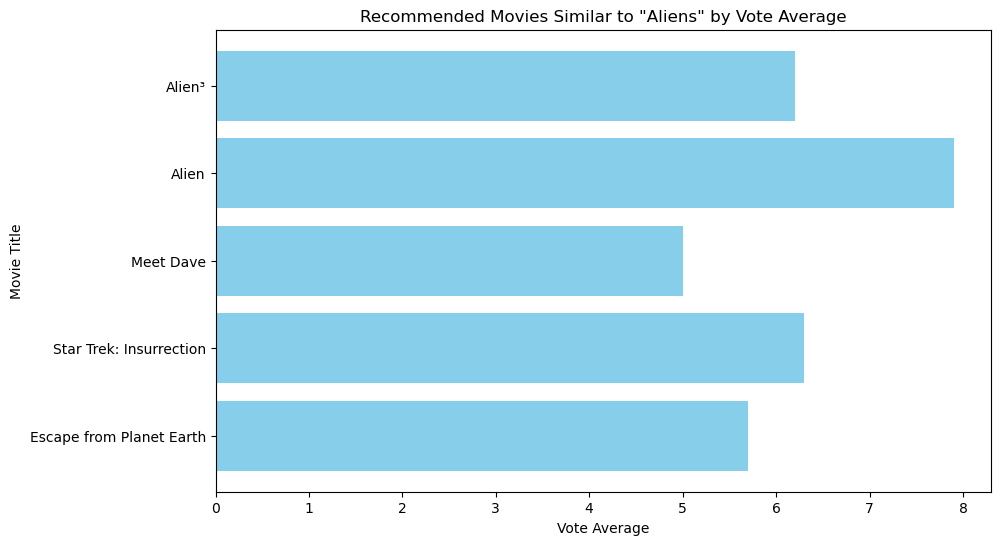

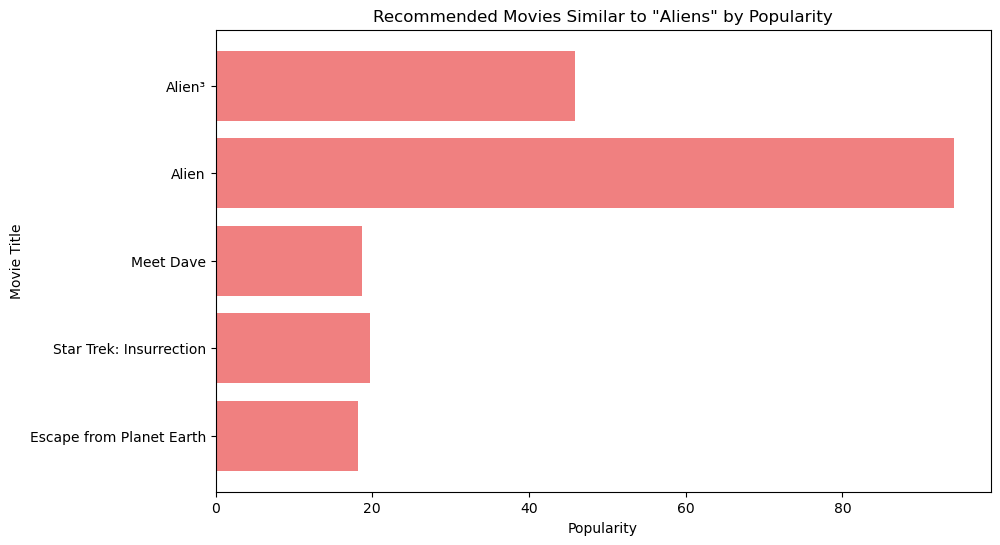

In [39]:
recommend("Aliens")

Iron Man 3
Iron Man 2
Avengers: Age of Ultron
X-Men
Guardians of the Galaxy


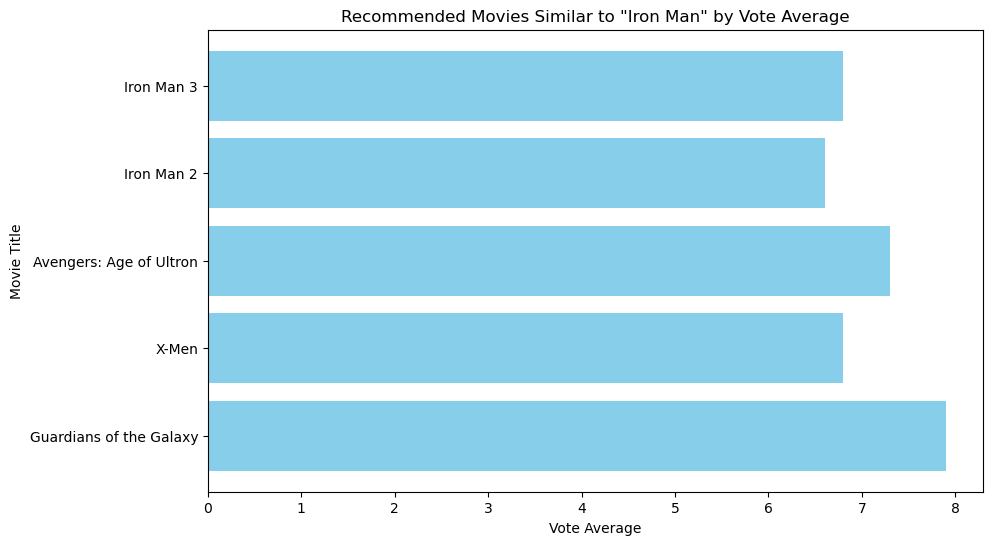

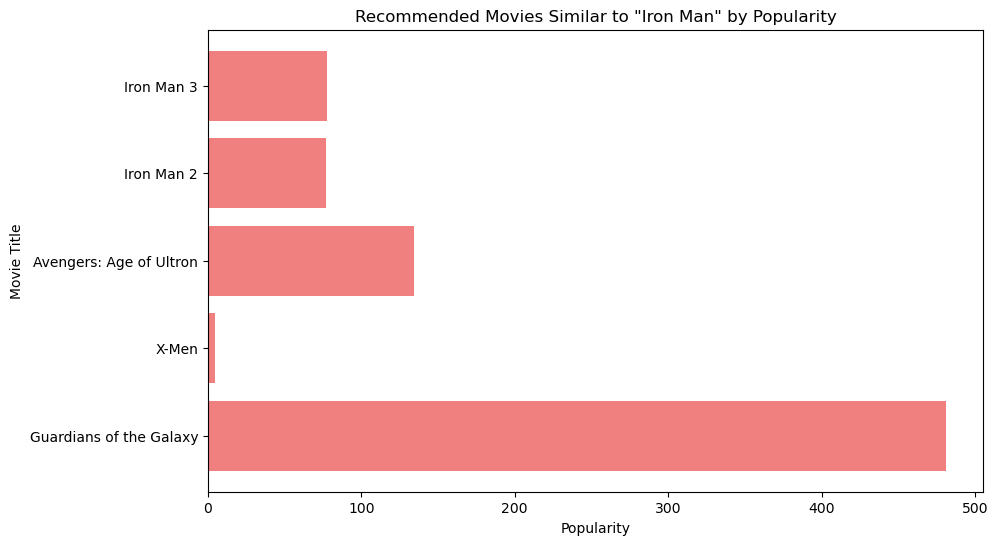

In [40]:
recommend("Iron Man")

Aliens vs Predator: Requiem
Titan A.E.
Falcon Rising
Independence Day
Jupiter Ascending


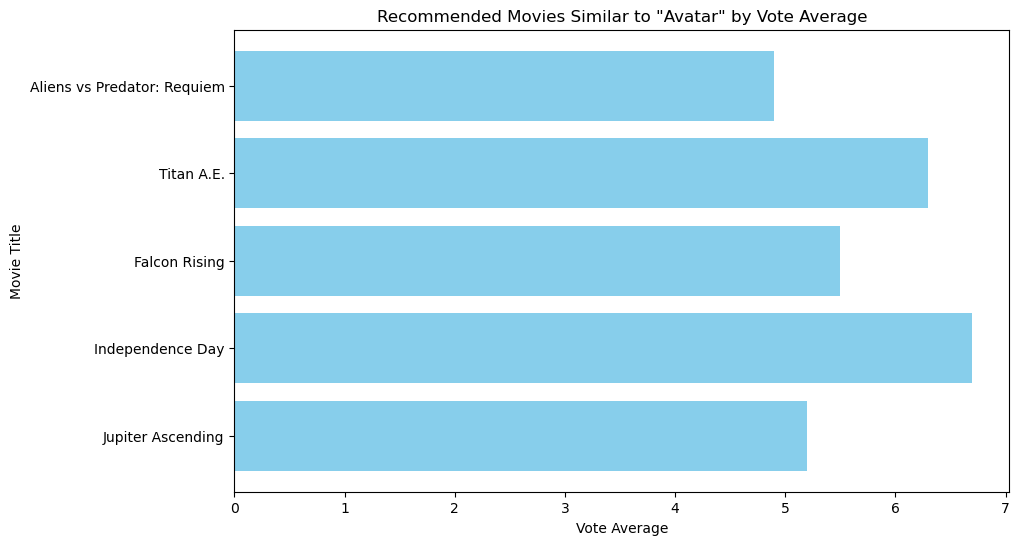

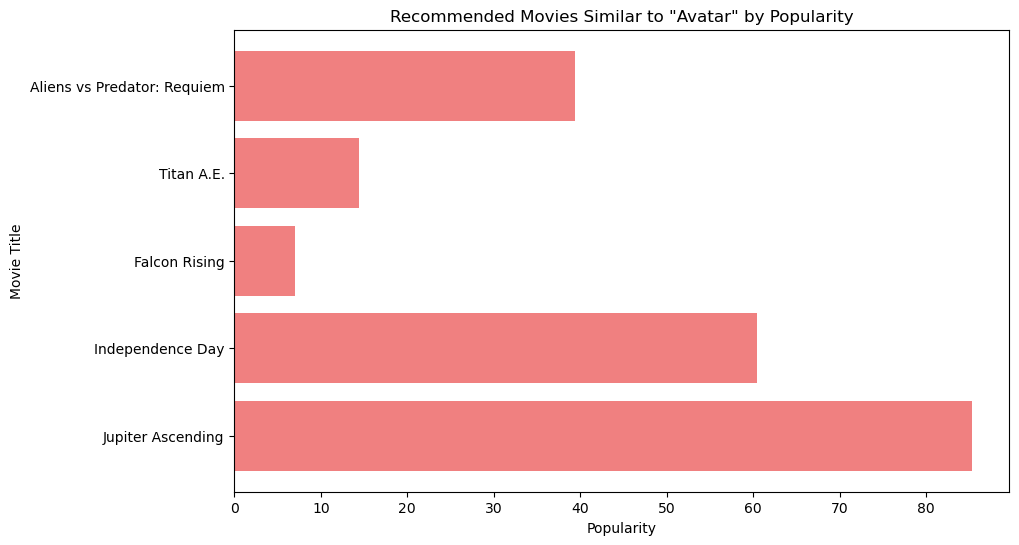

In [41]:
recommend("Avatar")

Aliens vs Predator: Requiem
Titan A.E.
Falcon Rising
Independence Day
Jupiter Ascending


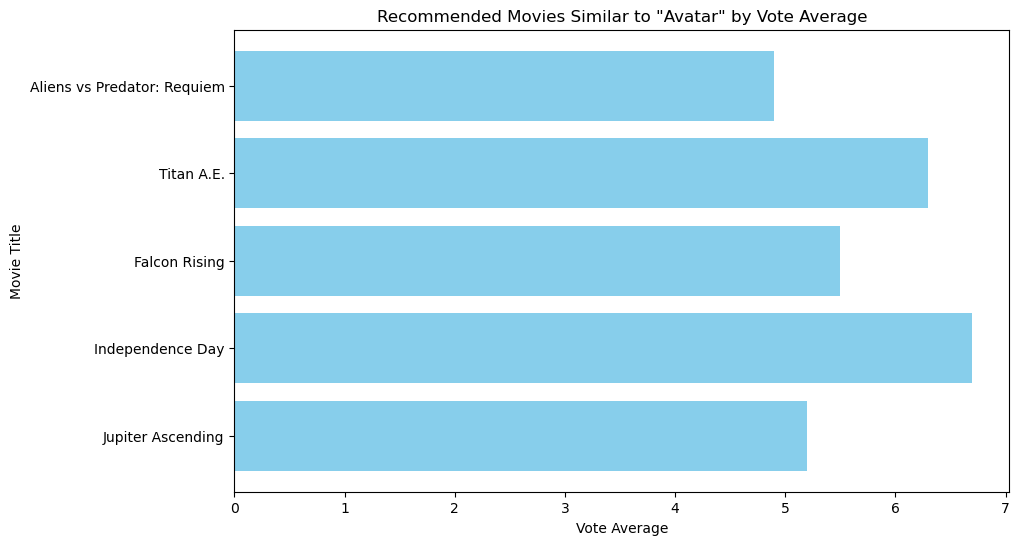

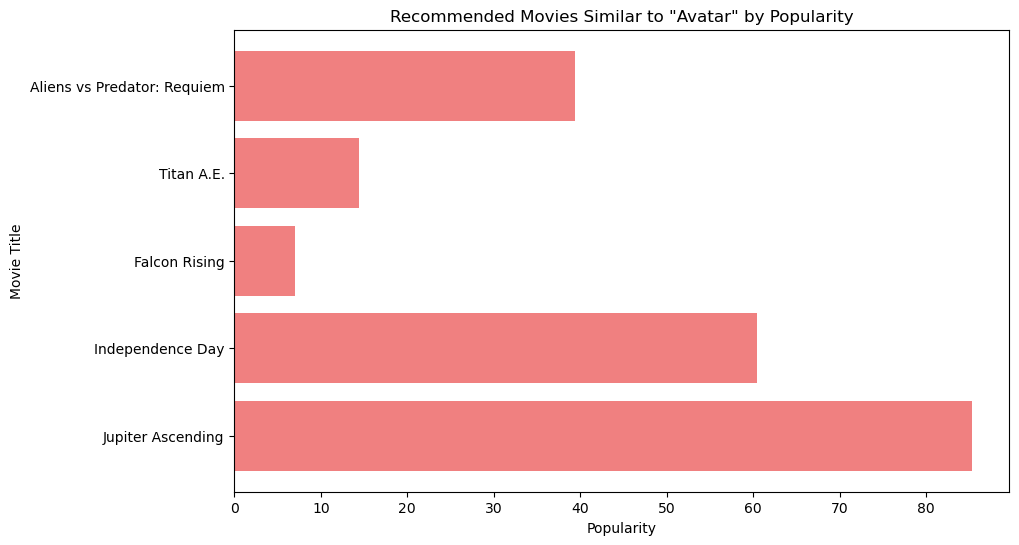

In [42]:
recommend("Avatar")

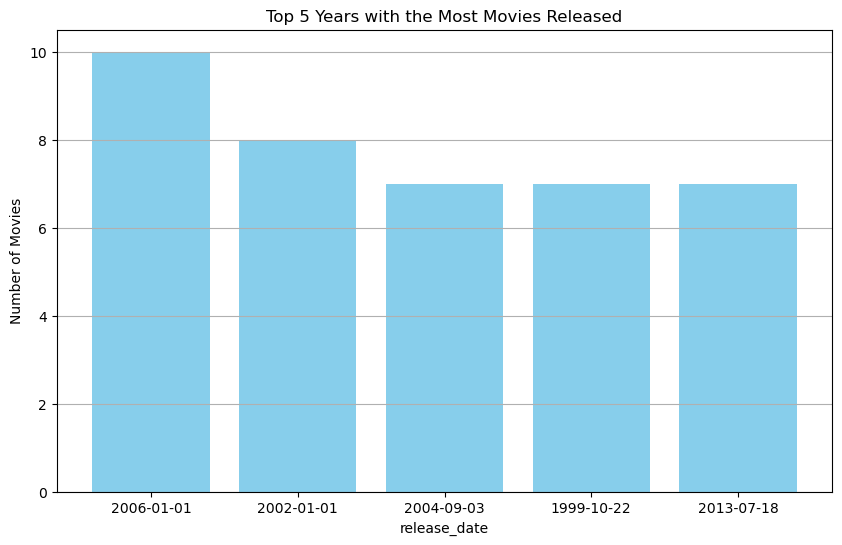

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your movie dataset (replace 'movies.csv' with your file path)
data = pd.read_csv('movies.csv')

# Count the number of movies per year
movie_counts = data['release_date'].value_counts()

# Get the top 5 years with the most movies
top_5_years = movie_counts.nlargest(5)

# Plotting the data for the top 5 years
plt.figure(figsize=(10, 6))
plt.bar(top_5_years.index, top_5_years.values, color='skyblue')
plt.xlabel('release_date')
plt.ylabel('Number of Movies')
plt.title('Top 5 Years with the Most Movies Released')
plt.xticks(top_5_years.index)
plt.grid(axis='y')

# Display the plot
plt.show()


Iron Man 3
Iron Man 2
Avengers: Age of Ultron
X-Men
Guardians of the Galaxy


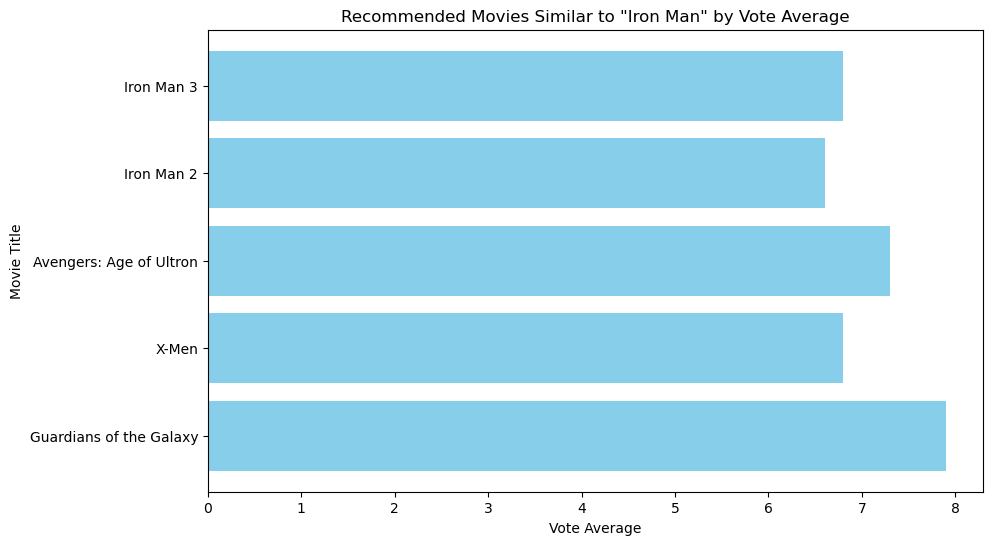

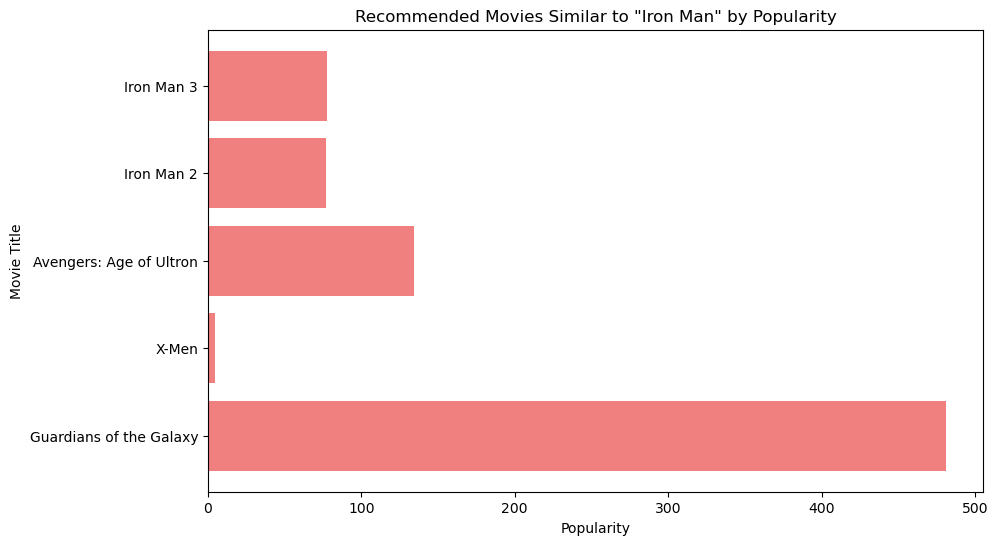

In [44]:
recommend("Iron Man")

Iron Man 3
Iron Man 2
Avengers: Age of Ultron
X-Men
Guardians of the Galaxy


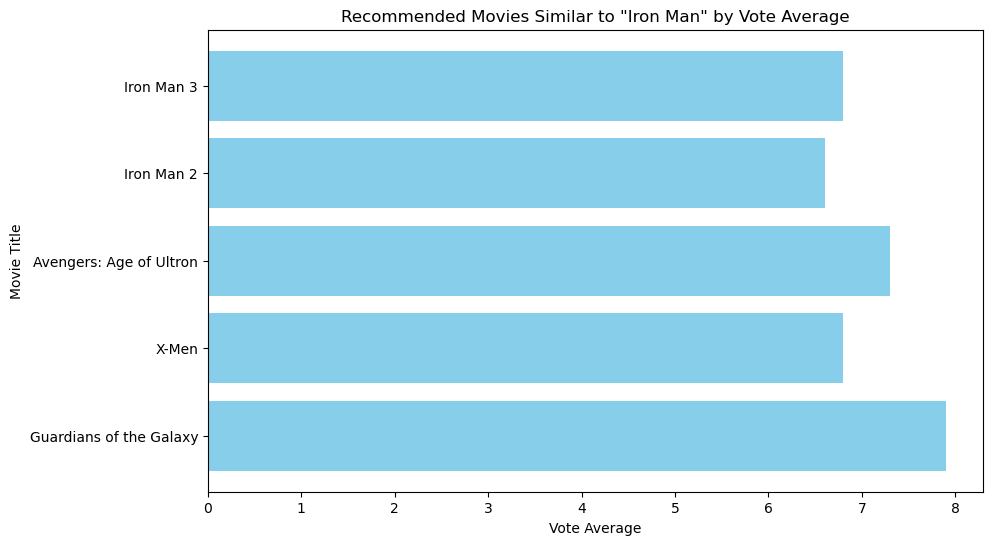

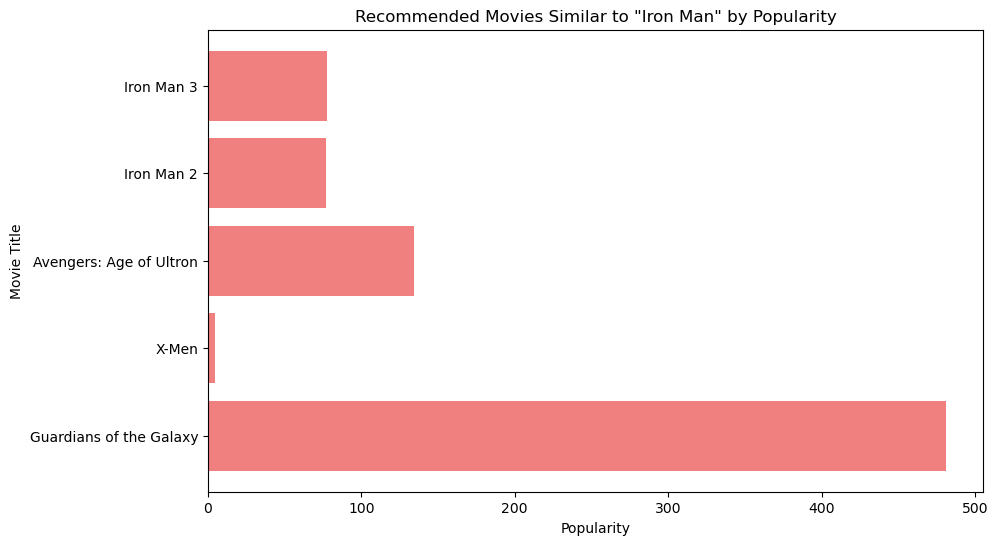

In [45]:
recommend("Iron Man")

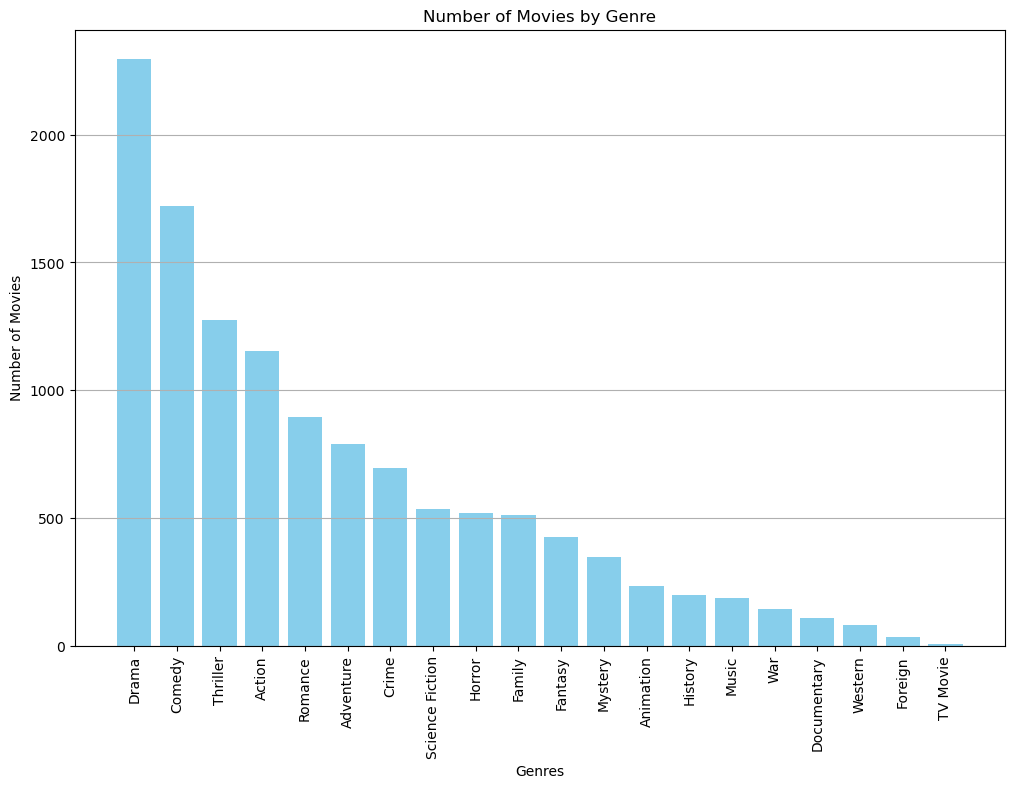

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load your movie dataset (replace 'movies.csv' with your file path)
data = pd.read_csv('movies.csv')

# Function to extract genres from the JSON-like strings
def extract_genres(genre_string):
    genres = ast.literal_eval(genre_string)
    return [genre['name'] for genre in genres]

# Extract genres and count each one
all_genres = data['genres'].apply(extract_genres).explode()

# Count occurrences of each genre
genre_counts = all_genres.value_counts()

# Plotting the data for genres
plt.figure(figsize=(12, 8))
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.xticks(rotation=90)  # Rotate genre names for better visibility
plt.grid(axis='y')

# Display the plot
plt.show()